# Exercise 2: PCA on Fashion MNIST
---

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

plt.rcParams['figure.dpi'] = 100

In [39]:
index_to_class = {

    0:	'T-shirt/top',
    1:	'Trouser',
    2:	'Pullover',
    3:	'Dress',
    4:	'Cat',
    5:	'Sandal',
    6:	'Shirt',
    7:	'Sneaker',
    8:	'Bag',
    9:	'Ankle boot'
}

In [40]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [41]:
X_train, y_train = load_mnist('fashion-mnist/data/fashion', kind='train')
X_test, y_test = load_mnist('fashion-mnist/data/fashion', kind='t10k')
dataset = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_test)])

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, dataset.shape

((60000, 784), (10000, 784), (60000,), (10000,), (70000, 784))

Visualize image

In [43]:
img_index = 6389

Text(0.5, 1.0, 'class: Bag')

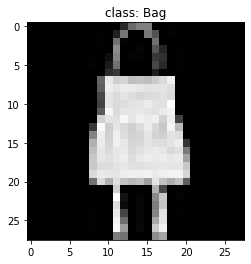

In [8]:
import matplotlib.pyplot as plt
reshaped_arr = X_train[img_index].reshape(28, 28)
plt.imshow(reshaped_arr, cmap='Greys_r')
plt.title(f'class: {index_to_class[y_train[img_index]]}')

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

PCA

In [57]:
n = 6

In [58]:
from sklearn.decomposition import PCA
dataset_pca = PCA(n_components=n).fit_transform(dataset)

In [59]:
dataset_pca.shape

(70000, 6)

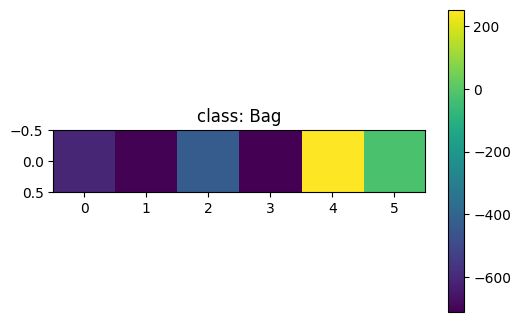

In [61]:
plt.imshow(dataset_pca[img_index].reshape((1, 6)))
plt.title(f'class: {index_to_class[y_train[img_index]]}')
plt.colorbar()
plt.show()

PCA last 6 

In [52]:
n2 = 784 # max possible PCA

In [53]:
from sklearn.decomposition import PCA
dataset_pca = PCA(n_components=n2).fit_transform(dataset)

In [54]:
dataset_pca.shape

(70000, 784)

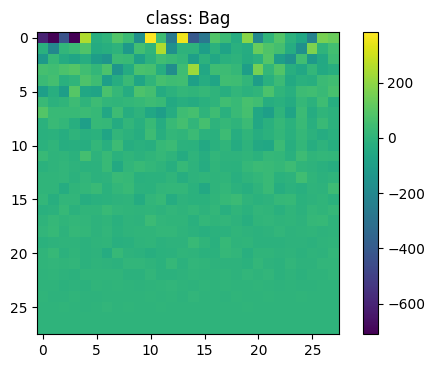

In [55]:
plt.imshow(dataset_pca[img_index].reshape((28, 28)))
plt.title(f'class: {index_to_class[y_train[img_index]]}')
plt.colorbar()
plt.show()